# Analyzing Dataset about Uber Drives 

1. When is the highest demand/traffic intensity during the day?
2. What is the average length of a ride?
3. What is the average number of rides per day, night, week, month?
4. What is the average length of a ride overall and by category (purpose)?
5. Where do most departures come from and to?
6. Is the number of rides tied to a holiday?
7. How do rush hour hours affect the speed of travel?

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('uber_drives.csv')
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [58]:
print(df.describe())
print(df.info())
print(df.isnull().sum())

             MILES*
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None
START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [59]:
# For PURPOSE* column there is a lot of null values which means we dont know the purpose of a ride

#### When is the highest demand/traffic intensity during the day?

In [60]:
df.columns = df.columns.str.rstrip("*")

df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"], errors="coerce")

# Spliting date and time to new columns
df["START_DATE_ONLY"] = df["START_DATE"].dt.date
df["START_TIME_ONLY"] = df["START_DATE"].dt.time
df["END_DATE_ONLY"] = df["END_DATE"].dt.date
df["END_TIME_ONLY"] = df["END_DATE"].dt.time

In [61]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_DATE_ONLY,START_TIME_ONLY,END_DATE_ONLY,END_TIME_ONLY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,01:25:00,2016-01-02,01:37:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17:15:00,2016-01-06,17:19:00
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17:30:00,2016-01-06,17:35:00
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13:27:00,2016-01-07,13:33:00
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,08:05:00,2016-01-10,08:25:00
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12:17:00,2016-01-10,12:44:00


In [62]:
# choosing only hour from time columns
start_hour = df['START_TIME_ONLY'].apply(lambda x: x.hour)
start_hour_counts = start_hour.value_counts().sort_index()

end_hour = df['END_TIME_ONLY'].apply(lambda x: x.hour)
end_hour_counts = end_hour.value_counts().sort_index()


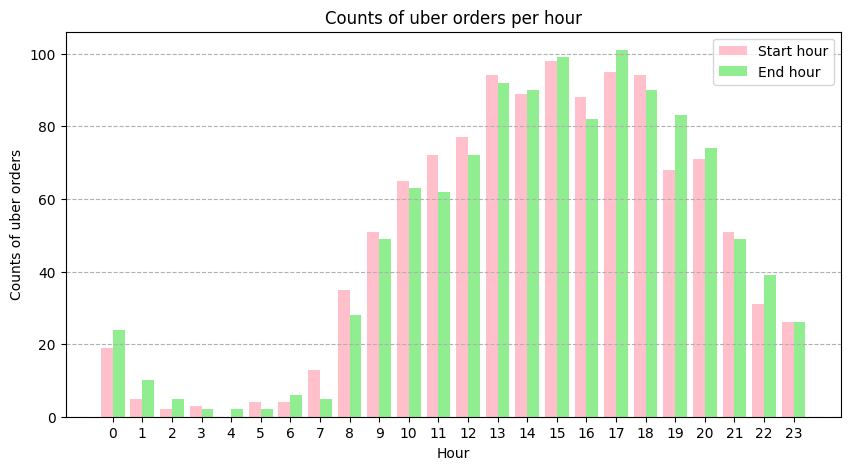

In [63]:
plt.figure(figsize=(10,5))
plt.bar(start_hour_counts.index - 0.2, start_hour_counts.values, width=0.4, color="pink", label='Start hour')
plt.bar(end_hour_counts.index + 0.2, end_hour_counts.values, width=0.4, color="lightgreen", label='End hour')

plt.title('Counts of uber orders per hour')
plt.xlabel('Hour')
plt.ylabel('Counts of uber orders')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

The highest number of Uber rides occurs between 14:00 and 18:00, indicating a strong demand in the afternoon and early evening.
This could be due to people finishing work or school, as well as social and recreational activities.

We can notice low activity in early morning.
The number of Uber rides is significantly lower between 2:00 and 6:00 AM, likely because most people are asleep, and there is minimal commuting or nightlife activity.

A noticeable rise in Uber rides begins around 7:00 AM, peaking towards noon. This may be associated with morning commutes and business-related travel.

After 19:00, there is a gradual decline in ride requests, indicating reduced transportation needs late at night.
Start vs. End Times Similarity:

The start and end times of Uber rides are closely aligned, meaning most trips are short-duration.

#### What is the average length of a ride?


In [64]:
df['DURATION'] = df['END_DATE'] - df['START_DATE']  
df['DURATION'].mean()
mean = str(df['DURATION'].mean()).replace("0 days ", "").split(".")[0]
print('Mean: ', mean)

Mean:  00:23:14


#### What is the average number of rides per day, night, week, month?


In [65]:
# We calssify night as time form 6 PM to 6 AM and day as time from 6 AM to 6 PM

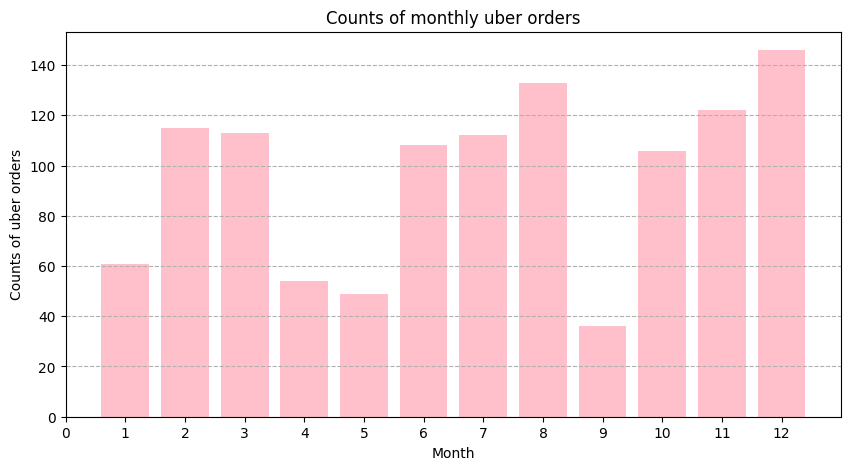

In [66]:
# Noc przyjmujemy jako od 18:00 do 6:00 a dzień od 6:00 do 18:00
# Tydzień rozpoczynamy od 01.01.2016
# average nuber of rides per month
month_values = df['START_DATE_ONLY'].apply(lambda x: x.month)
month_values_counts = month_values.value_counts().sort_index()
month_values_counts

plt.figure(figsize=(10,5))
plt.bar(month_values_counts.index, month_values_counts.values, color='pink')
plt.title('Counts of monthly uber orders')
plt.xlabel('Month')
plt.ylabel('Counts of uber orders')
plt.xticks(range(0,13))
plt.grid(axis='y', linestyle='--')
plt.show()

We observe a drastic drop in Uber rides in September, the post-holiday period. High values are visible in June, July, and August – the summer months – as well as in the pre-holiday season. The weather conditions in a given location may influence the data shown above.

The months of March, February, October, November, and December are characterized by low temperatures, whereas June, July, and August experience high temperatures. Such extreme temperatures can be uncomfortable for most of the population.

April, May, and September have moderate temperatures, which encourage walking and taking advantage of the optimal weather, leading to lower Uber usage.

#### What is the average length of a ride overall and by category (purpose)?


In [67]:
df['DURATION'].mean()

print(df['PURPOSE'].value_counts(), '\n')
unique_purposes = df['PURPOSE'].unique()

for i in unique_purposes:
    global selected, mean_duration
    selected = df[df['PURPOSE'] == i]
    mean_duration = selected['DURATION'].mean()
    mean_duration = str(mean_duration).replace("0 days ", "").split(".")[0]
    print('Category: ', i, '\n Duration: ', mean_duration, '\n')

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64 

Category:  Meal/Entertain 
 Duration:  00:16:07 

Category:  nan 
 Duration:  NaT 

Category:  Errand/Supplies 
 Duration:  00:12:58 

Category:  Meeting 
 Duration:  00:29:44 

Category:  Customer Visit 
 Duration:  00:33:24 

Category:  Temporary Site 
 Duration:  00:25:51 

Category:  Between Offices 
 Duration:  00:25:30 

Category:  Charity ($) 
 Duration:  00:27:00 

Category:  Commute 
 Duration:  03:05:00 

Category:  Moving 
 Duration:  00:15:00 

Category:  Airport/Travel 
 Duration:  00:26:00 



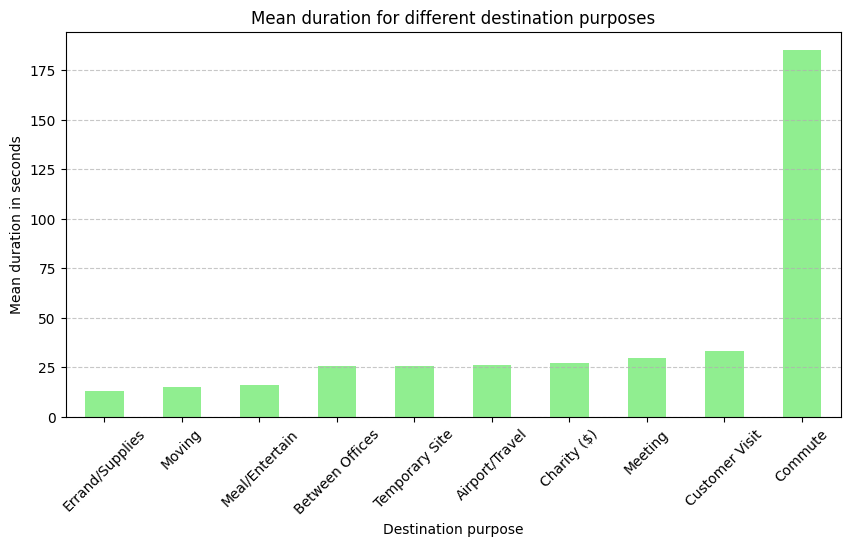

In [68]:
mean_durations = df.groupby("PURPOSE")["DURATION"].mean()

# Deleting "0 days" and transforming timedelta to minutes
mean_durations_clean = mean_durations.dt.total_seconds() / 60  

plt.figure(figsize=(10, 5))
mean_durations_clean.sort_values().plot(kind="bar", color="lightgreen")

plt.xlabel("Destination purpose")
plt.ylabel("Mean duration in seconds")
plt.title("Mean duration for different destination purposes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

It can be observed that the average value for Commute is extremely high. This is partly due to the fact that only one measurement was recorded for this category, making it potentially unrepresentative compared to the other categories. Moreover, this trip lasted three hours, which is about six times longer than the previous one.

To ensure greater objectivity, the chart below was created without the Commute category.

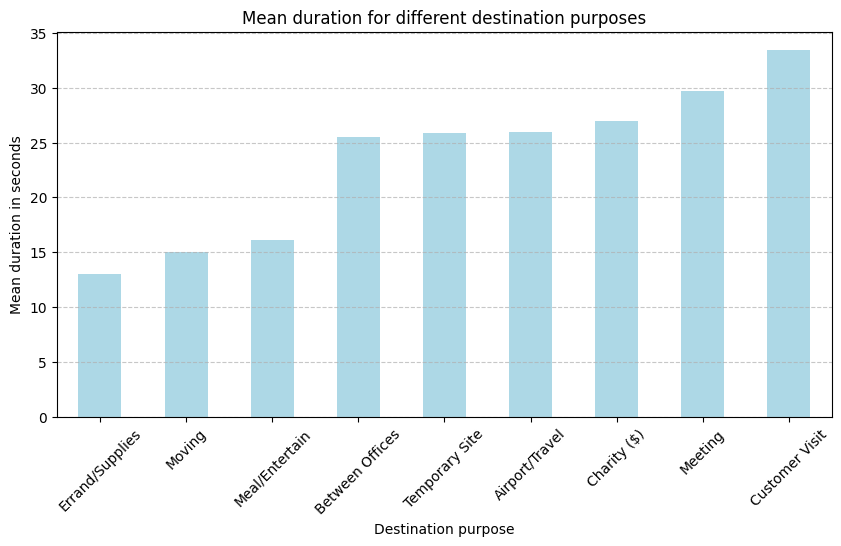

In [69]:
mean_durations_clean = mean_durations_clean.drop("Commute", errors='ignore')

plt.figure(figsize=(10, 5))
mean_durations_clean.sort_values().plot(kind="bar", color="lightblue")

plt.xlabel("Destination purpose")
plt.ylabel("Mean duration in seconds")
plt.title("Mean duration for different destination purposes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Where do most departures come from and to?

In [70]:
direction_start =  df.groupby('START')['START'].count()
direction_stop = df.groupby('STOP')['STOP'].count()

print(direction_start, '\n')
print(direction_stop, '\n' )

START
Agnew               4
Almond              1
Apex               17
Arabi               1
Arlington           1
                   ..
West University     2
Weston              2
Westpark Place     17
Whitebridge        68
Winston Salem       1
Name: START, Length: 177, dtype: int64 

STOP
Agnew                  4
Alief                  1
Almond                 1
Apex                  17
Arabi                  1
                      ..
Weston                 5
Westpark Place        16
Whitebridge           65
Williamsburg Manor     1
Winston Salem          1
Name: STOP, Length: 188, dtype: int64 



In [71]:
sorted_start_values = direction_start.sort_values(ascending=False)
top10_start = sorted_start_values.head(10)
print(top10_start, '\n')

sorted_stop_values = direction_stop.sort_values(ascending=False)
top10_stop = sorted_stop_values.head(10)
print(top10_stop, '\n')

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: START, dtype: int64 

STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64 



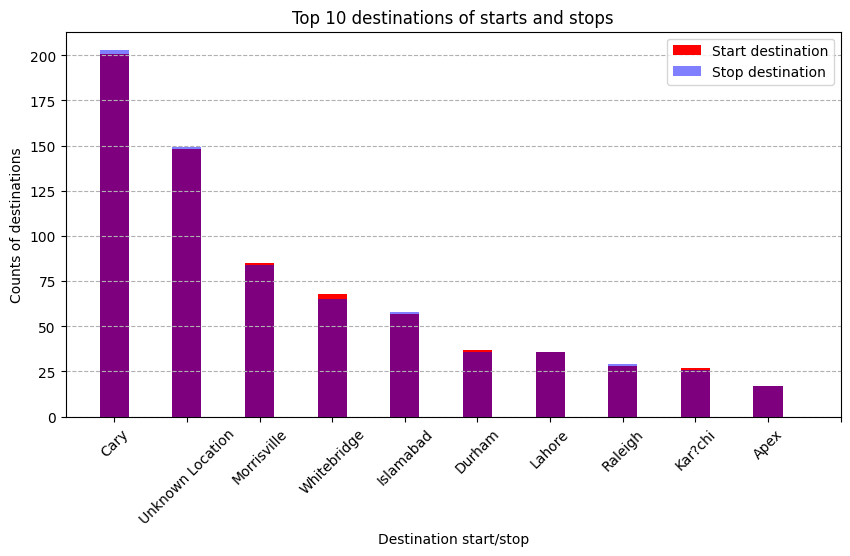

In [89]:
plt.figure(figsize=(10,5))
plt.bar(top10_start.index , top10_start.values, width=0.4, color="red", label='Start destination')
plt.bar(top10_stop.index, top10_stop.values, width=0.4, color="blue", label='Stop destination', alpha=0.5)

plt.title('Top 10 destinations of starts and stops')
plt.xlabel('Destination start/stop')
plt.ylabel('Counts of destinations')
plt.xticks(range(0,11), rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

Cary and Unknown Location are the most frequent destinations – both for ride starts and stops, significantly surpassing other locations.
Morrisville, Whitebridge, and Islamabad follow as mid-tier destinations, though they see notably fewer trips compared to Cary.
Start and stop destinations are mostly balanced, but minor differences exist – some locations have more starts than stops and vice versa.
Smaller destinations such as Apex, Karachi, and Raleigh have relatively lower Uber activity compared to the leading destinations.
There is a clear drop-off in ride frequency after the top two destinations, indicating a heavy concentration of trips in a few key locations.
Overall, the chart suggests that Uber rides are highly concentrated in specific urban areas, likely due to population density, business hubs, or transportation demand in those locations.

#### Is the number of rides tied to a holiday?

START_DATE_ONLY
2016-01-01     1
2016-01-02     2
2016-01-05     1
2016-01-06     3
2016-01-07     1
              ..
2016-12-27     6
2016-12-28     7
2016-12-29    13
2016-12-30     5
2016-12-31     5
Name: count, Length: 294, dtype: int64


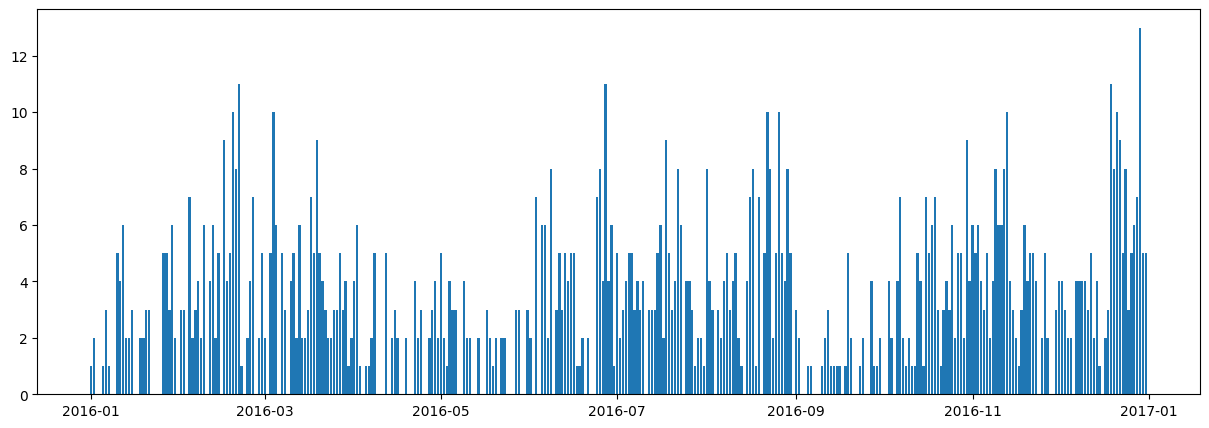

In [73]:
total_counts = df['START_DATE_ONLY'].value_counts().sort_index()

plt.figure(figsize=(15,5))
plt.bar(total_counts.index, total_counts.values )

print(total_counts)

In [74]:
total_counts.sort_values(ascending=False).head(20)

START_DATE_ONLY
2016-12-29    13
2016-06-27    11
2016-12-19    11
2016-02-21    11
2016-03-04    10
2016-12-21    10
2016-02-19    10
2016-11-13    10
2016-08-26    10
2016-08-22    10
2016-02-16     9
2016-03-19     9
2016-12-22     9
2016-07-18     9
2016-10-30     9
2016-11-12     8
2016-11-09     8
2016-08-29     8
2016-08-23     8
2016-02-20     8
Name: count, dtype: int64

Looking at results I came to conclusion that uber drives are not connected with any special days.

####  How do rush hour hours affect the speed of travel?

In [75]:
df["TIME_HOURS"] = df["DURATION"].dt.total_seconds() / 3600  
df.loc[df["TIME_HOURS"] == 0, "TIME_HOURS"] = np.nan  

# Calculating velocity
df["VELOCITY"] = df["MILES"] / df["TIME_HOURS"]

# Calculating mean velocity for each hour
df["START_HOUR"] = df["START_TIME_ONLY"].apply(lambda x: x.hour)
mean_velocity_by_hour = df.groupby("START_HOUR")["VELOCITY"].mean()


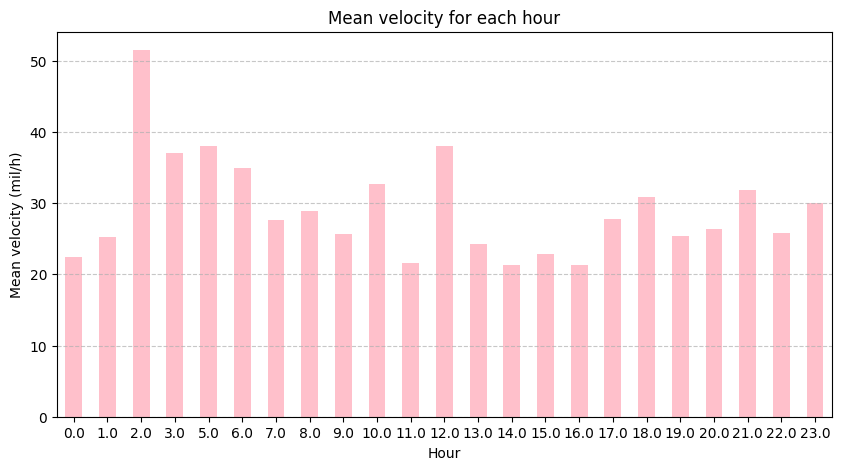

START_HOUR
0.0     22.411612
1.0     25.244878
2.0     51.503342
3.0     37.023379
5.0     38.083662
6.0     34.987447
7.0     27.702062
8.0     28.946191
9.0     25.704911
10.0    32.636946
11.0    21.541927
12.0    37.965568
13.0    24.220455
14.0    21.363466
15.0    22.868062
16.0    21.250707
17.0    27.746767
18.0    30.849548
19.0    25.319700
20.0    26.309878
21.0    31.810132
22.0    25.849632
23.0    30.054946
Name: VELOCITY, dtype: float64


In [86]:
plt.figure(figsize=(10, 5))
mean_velocity_by_hour.plot(kind="bar", color="pink")

plt.xlabel("Hour")
plt.ylabel("Mean velocity (mil/h)")
plt.title("Mean velocity for each hour")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
print(mean_velocity_by_hour)

High speed values can be observed in the early morning hours. During peak hours, speed is slightly lower than in other periods, which may be influenced by traffic congestion, high vehicle density on the roads, and similar factors.